In [92]:
import pandas as pd
data_frame = pd.read_csv("data.csv")

In [101]:
df1 = pd.DataFrame(data_frame, columns=["Name", "Wage", "Value"])

In [102]:
def remove_char(item):
    if len(item) != 0:
        if "M" in item:
            return float(item.replace("M", "")) * 1000000
        elif "K" in item:
            return float(item.replace("K", "")) * 1000
    else:
        return 0.0



value = df1["Value"].str.replace("€","").apply(remove_char)
wage = df1["Wage"].str.replace("€","").apply(remove_char)
df1["Wage"] = wage
df1["Value"] = value
df1["Value_Wage_Difference"] = df1["Value"] - df1["Wage"]
df1.sort_values("Value_Wage_Difference", ascending=False)

Name      Wage        Value  Value_Wage_Difference
2          Neymar Jr  290000.0  118500000.0            118210000.0
0           L. Messi  565000.0  110500000.0            109935000.0
4       K. De Bruyne  355000.0  102000000.0            101645000.0
5          E. Hazard  340000.0   93000000.0             92660000.0
15         P. Dybala  205000.0   89000000.0             88795000.0
...              ...       ...          ...                    ...
17539       C. Singh       NaN          NaN                    NaN
17672       R. Kawai    1000.0          NaN                    NaN
17726      T. Warner    1000.0          NaN                    NaN
17752    S. Phillips    1000.0          NaN                    NaN
18183  K. Pilkington    1000.0          NaN                    NaN

[18207 rows x 4 columns]

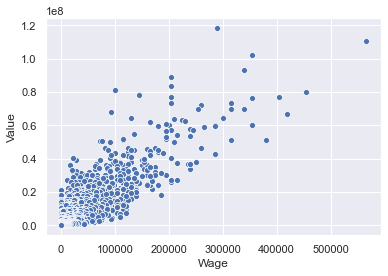

In [106]:
import seaborn as sns
sns.set()


graph = sns.scatterplot(x="Wage", y="Value", data=df1)
graph


In [111]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")])

p = figure(title="Soccer 2019", x_axis_label="Wage", y_axis_label="Value", plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle("Wage", "Value", size=10, source=df1, line_color="white", hover_line_color="red")
show(p)